https://app.outscraper.com/googleMaps?c=hotel&dd=true&gl=BR&hl=pt-BR&limit=499&z=true



# Reunindo dados raspados via serviço externo (gratuíto)

In [133]:
import pandas as pd
import numpy as np

In [134]:
import glob

files = glob.glob("scraper/input/*.xlsx")

files

['scraper/input\\Outscraper-20240508122337bd64_resort_hotel_+2.xlsx',
 'scraper/input\\Outscraper-20240508122753d29f (1).xlsx',
 'scraper/input\\Outscraper-20240508122753d29f.xlsx',
 'scraper/input\\Outscraper-20240508125928c481_hotel.xlsx',
 'scraper/input\\Outscraper-20240508131552fbbe.xlsx']

In [135]:
dfs = []
for file in files:
    df = pd.read_excel(file)
    dfs.append(df)

In [136]:
df = pd.concat(dfs)
df.shape

(2003, 82)

# Filtrando

In [188]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [189]:
df.sample().iloc[0]

query                                          hotel, 55620-000, Glória do Goitá, Pernambuco ...
name                                                                         Star Hotel Limoeiro
name_for_emails                                                              Star Hotel Limoeiro
site                                                            http://starhotellimoeiro.com.br/
site.company_insights.address                                                                NaN
site.company_insights.city                                                                   NaN
site.company_insights.country                                                             Brazil
site.company_insights.description                                                            NaN
site.company_insights.employees                                                             10.0
site.company_insights.facebook_company_page                                                  NaN
site.company_insights.is_publi

In [190]:
# Removendo lugares fechados e sem reviews
df_filter = df.drop_duplicates("place_id").query("business_status == 'OPERATIONAL' & reviews >= 5")
df_filter.shape

(1386, 82)

In [191]:
# Removendo lugares com o mesmo nome, mantendo aqueles com maior número de avaliações
df_filter = df_filter.sort_values("reviews", ascending=False).drop_duplicates("name")
df_filter.shape

(1356, 82)

In [192]:
cols = [
    "name",
    "reviews",
    "rating",

    "city",
    "state",
    "latitude",
    "longitude",
    # "full_address",

    "range",
    # "type",
    # "subtypes",
    # "category",

    # "reviews_per_score_1",
    # "reviews_per_score_2",
    # "reviews_per_score_3",
    # "reviews_per_score_4",
    # "reviews_per_score_5",
    # "about",

    # "owner_title",

    "business_status",
    "google_id",
    "place_id",
]

In [193]:
df_filter[cols]

,name,reviews,rating,city,state,latitude,longitude,range,business_status,google_id,place_id
359,Wyndham Olimpia Royal Hotel,12835.0,4.5,Olímpia,São Paulo,-20.717466,-48.917720,4 estrelas,OPERATIONAL,0x94bc6fa8fe446ec9:0x5ccb78373a2d5e26,ChIJyW5E_qhvvJQRJl4tOjd4y1w
73,Hotel Villa Lobos Spa Romantik,8762.0,4.8,Extrema,Minas Gerais,-22.843295,-46.329954,4 estrelas,OPERATIONAL,0x94ceadae1ef20e39:0x4b6fe14511fcf394,ChIJOQ7yHq6tzpQRlPP8EUXhb0s
358,Thermas de Olimpia Resorts By Mercure,7487.0,4.0,Olímpia,São Paulo,-20.721898,-48.916238,4 estrelas,OPERATIONAL,0x94bc6fad6183b5eb:0x9eb505faccb668d4,ChIJ67WDYa1vvJQR1Gi2zPoFtZ4
453,Hotel Fazenda Vale do Sol,4667.0,4.6,Serra Negra,SP,-22.604534,-46.694669,NaN,OPERATIONAL,0x94c9186bd01db787:0x18ca5e125783c845,ChIJh7cd0GsYyZQRRciDVxJeyhg
414,Hotel Porto Real Resort,4570.0,4.5,Mangaratiba,Rio de Janeiro,-23.035686,-44.149237,4 estrelas,OPERATIONAL,0x9c439790749def:0x61cb3cde96c15a95,ChIJ7510kJdDnAARlVrBlt48y2E
...,...,...,...,...,...,...,...,...,...,...,...
58,Chalé Estilo Mineiro,5.0,4.0,Camanducaia,Minas Gerais,-22.809241,-46.142797,NaN,OPERATIONAL,0x94cc0584daf5060b:0x7e8f27b35af0c959,ChIJCwb12oQFzJQRWcnwWrMnj34
164,Pousada Xapuri,5.0,4.8,Muriaé,Minas Gerais,-20.878293,-42.485069,NaN,OPERATIONAL,0xbcadee2e030269:0x5574e8a06b9dab9e,ChIJaQIDLu6tvAARnquda6DodFU
163,Pousada São João,5.0,3.8,São João,Pernambuco,-8.873199,-36.365864,NaN,OPERATIONAL,0x7076d5247bcb143:0x8b73d076f74af483,ChIJQ7G8R1JtBwcRg_RK93bQc4s
246,Guest house Dharma,5.0,5.0,São José do Rio Preto,São Paulo,-20.815689,-49.375013,NaN,OPERATIONAL,0x94bdadf4faee9cbd:0x9cdb8dd14d639670,ChIJvZzu-vStvZQRcJZjTdGN25w


In [194]:
df_input = df_filter.copy()

In [195]:
df_input.columns

Index(['query', 'name', 'name_for_emails', 'site',
       'site.company_insights.address', 'site.company_insights.city',
       'site.company_insights.country', 'site.company_insights.description',
       'site.company_insights.employees',
       'site.company_insights.facebook_company_page',
       'site.company_insights.is_public',
       'site.company_insights.linkedin_company_page',
       'site.company_insights.name', 'site.company_insights.phone',
       'site.company_insights.revenue', 'site.company_insights.state',
       'site.company_insights.timezone',
       'site.company_insights.twitter_handle', 'site.company_insights.zip',
       'subtypes', 'category', 'type', 'phone', 'full_address', 'borough',
       'street', 'city', 'postal_code', 'state', 'us_state', 'country',
       'country_code', 'latitude', 'longitude', 'h3', 'time_zone', 'plus_code',
       'area_service', 'rating', 'reviews', 'reviews_link', 'reviews_tags',
       'reviews_per_score', 'reviews_per_score_1', 

In [196]:
df_input["done"] = 0
df_input["n_reviews"] = -1
df_input["n_reviews_max"] = df_input["reviews"].astype("int64")
df_input["sort_by"] = "most_relevant"
df_input["hl"] = "pt-br"
df_input["url"] = df_input["location_link"]
df_input["dt_selection"] = 2024

In [197]:
df_input.columns

Index(['query', 'name', 'name_for_emails', 'site',
       'site.company_insights.address', 'site.company_insights.city',
       'site.company_insights.country', 'site.company_insights.description',
       'site.company_insights.employees',
       'site.company_insights.facebook_company_page',
       'site.company_insights.is_public',
       'site.company_insights.linkedin_company_page',
       'site.company_insights.name', 'site.company_insights.phone',
       'site.company_insights.revenue', 'site.company_insights.state',
       'site.company_insights.timezone',
       'site.company_insights.twitter_handle', 'site.company_insights.zip',
       'subtypes', 'category', 'type', 'phone', 'full_address', 'borough',
       'street', 'city', 'postal_code', 'state', 'us_state', 'country',
       'country_code', 'latitude', 'longitude', 'h3', 'time_zone', 'plus_code',
       'area_service', 'rating', 'reviews', 'reviews_link', 'reviews_tags',
       'reviews_per_score', 'reviews_per_score_1', 

In [198]:
cols_input = ["done","name","n_reviews","sort_by","hl","url","google_id","n_reviews_max","dt_selection"]
df_input = df_input[cols_input].sort_values("n_reviews_max", ascending=True)

In [199]:
df_input.head()

,done,name,n_reviews,sort_by,hl,url,google_id,n_reviews_max,dt_selection
197,0,Hotel Sara,-1,most_relevant,pt-br,https://www.google.com/maps/place/Hotel+Sara/@...,0x91f155649845b03b:0xe6966179c101261f,5,2024
397,0,Travessa 12 - Suítes - Serra Negra - SP,-1,most_relevant,pt-br,https://www.google.com/maps/place/Travessa+12+...,0x94c919d9be658e4b:0xaa695228fec7cf95,5,2024
212,0,Pousada Espaço Vida,-1,most_relevant,pt-br,https://www.google.com/maps/place/Pousada+Espa...,0x7af83234e742ee9:0xa90f1ee7372b82e,5,2024
121,0,Hotel Place Jardin,-1,most_relevant,pt-br,https://www.google.com/maps/place/Hotel+Place+...,0x7070d62b772ae6b:0xacfe5b07a46999dc,5,2024
19,0,Hotel Fazenda Engenho Cordeiro,-1,most_relevant,pt-br,https://www.google.com/maps/place/Hotel+Fazend...,0x7aba334020ce3ff:0xa082e2f0e6d45e7d,5,2024


In [200]:
df_input.to_csv("scraper/input/hotels_24_05_08.csv", index=False)

# Lista de hoteis 2024

In [201]:
import re

def parse_url(url):
    return re.findall("0[xX][0-9a-fA-F]+:0[xX][0-9a-fA-F]+", url)[0]

In [202]:
df_old = pd.read_csv("scraper/input/hotels_23_01_19.csv")

In [203]:
df_old["google_id"] = df_old["url"].apply(parse_url)
df_old["sort_by"] = "most_relevant"
df_old["done"] = 0
df_old["dt_selection"] = 2023
df_old.head()

,done,name,sort_by,hl,n_reviews,url,use,name_raw,n_reviews_max,state,region,overall_rating,stars,google_id,dt_selection
0,0,Atlântico Center,most_relevant,pt-br,-1,https://www.google.com/maps/place/Atl%C3%A2nti...,1,Atlântico Center,1382,RJ,SUDESTE,2.9,0,0x0:0xcb0d68682790adde,2023
1,0,Hotel Pirâmide,most_relevant,pt-br,-1,https://www.google.com/maps/place/Hotel+Pir%C3...,1,Hotel Pirâmide,2464,BA,NORDESTE,3.4,2,0x0:0xd7dcb01eac806d59,2023
2,0,Caravelle Palace Hotel,most_relevant,pt-br,-1,https://www.google.com/maps/place/Caravelle+Pa...,1,Caravelle Palace Hotel,3180,PR,SUL,3.6,4,0x0:0x46c9e8944e610e0a,2023
3,0,Taj Mahal Continental Hotel,most_relevant,pt-br,-1,https://www.google.com/maps/place/Taj+Mahal+Co...,1,Taj Mahal Continental Hotel,1841,AM,NORTE,3.7,5,0x0:0x1735c41b4114de3,2023
4,0,Atlantic Hotel Copacabana,most_relevant,pt-br,-1,https://www.google.com/maps/place/Atlantic+Hot...,1,Atlantic Hotel Copacabana,4860,RJ,SUDESTE,3.7,2,0x9bd55a45ed7abb:0xc6bf79907daf138b,2023


In [204]:
df_old = df_old[cols_input]

In [205]:
df_old.head()

,done,name,n_reviews,sort_by,hl,url,google_id,n_reviews_max,dt_selection
0,0,Atlântico Center,-1,most_relevant,pt-br,https://www.google.com/maps/place/Atl%C3%A2nti...,0x0:0xcb0d68682790adde,1382,2023
1,0,Hotel Pirâmide,-1,most_relevant,pt-br,https://www.google.com/maps/place/Hotel+Pir%C3...,0x0:0xd7dcb01eac806d59,2464,2023
2,0,Caravelle Palace Hotel,-1,most_relevant,pt-br,https://www.google.com/maps/place/Caravelle+Pa...,0x0:0x46c9e8944e610e0a,3180,2023
3,0,Taj Mahal Continental Hotel,-1,most_relevant,pt-br,https://www.google.com/maps/place/Taj+Mahal+Co...,0x0:0x1735c41b4114de3,1841,2023
4,0,Atlantic Hotel Copacabana,-1,most_relevant,pt-br,https://www.google.com/maps/place/Atlantic+Hot...,0x9bd55a45ed7abb:0xc6bf79907daf138b,4860,2023


# Unindo listas

In [206]:
df_input_full = pd.concat([df_input, df_old])
df_input_full.shape

(1406, 9)

In [207]:
df_input_full = df_input_full.sort_values("dt_selection", ascending=False).drop_duplicates("google_id")
df_input_full.shape

(1406, 9)

In [208]:
df_input_full = df_input_full.sort_values("n_reviews_max", ascending=True)

In [210]:
df_input.to_csv("scraper/input/hotels_24_merged.csv", index=False)

In [221]:
df_input_missing = df_input_full.query("n_reviews_max > 1200 | dt_selection == 2023")

In [223]:
df_input_missing["sort_by"] = "newest"
df_input_missing.to_csv("scraper/input/hotels_24_big.csv", index=False)

C:\Users\Bruno\AppData\Local\Temp\ipykernel_15160\619226628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_missing["sort_by"] = "newest"


<AxesSubplot:ylabel='Frequency'>

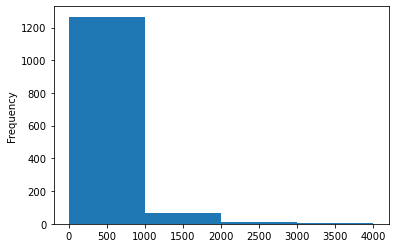

In [219]:
bins=[0,1000,2000,3000,4000]
df_input.n_reviews_max.plot(kind="hist", bins=bins, xlabel=bins)